# Partie sur la prediction des données

## Prédiction des scores des elections du second tour 2022 par Departement

### Bibliothèque utilisée

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

### Chargement du dataset

In [2]:
df_concat = pd.read_excel('Departement.xlsx')
print(df_concat)

                Departement  nbPersonne     Macron      Lepen  niveauEtude  \
0                       Ain      671937  50.982366  49.017659         41.4   
1                     Aisne      522791  38.089161  61.910914         29.7   
2                    Allier      332443  48.201987  51.798013         33.4   
3   Alpes-de-Haute-Provence      166654  47.890556  52.109697         37.2   
4              Hautes-Alpes      139942  53.414383  46.585802         41.7   
..                      ...         ...        ...        ...          ...   
89    Territoire de Belfort      136891  45.499208  54.500792         43.3   
90                  Essonne     1316053  58.871340  41.128711         47.5   
91           Hauts-de-Seine     1642002  80.148611  19.851389         71.1   
92             Val-de-Marne     1426748  71.616596  28.383404         56.1   
93               Val-d'Oise     1274374  58.109402  41.890707         45.2   

    tauxChomage  Proximité    Immigré  
0           5.5       1

### Normalisation des données

In [3]:
# Sélection des features
df_concat = df_concat.sample(frac=1)
X = df_concat.drop(['Departement','Macron', 'Lepen'], axis=1)
features = X.values
ScoreMacron =  df_concat['Macron'].values.reshape(-1, 1)
ScoreLepen =  df_concat['Lepen'].values.reshape(-1, 1)

# Normalisation des données
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(features)
scalerMacron = StandardScaler()
ScoreMacron = scalerMacron.fit_transform(ScoreMacron)
scalerLepen = StandardScaler()
ScoreLepen = scalerLepen.fit_transform(ScoreLepen)

### Selection des colonnes pertinantes

In [4]:
def Selection_Colonne_Pvalue(label):
    # Création de l'analyse pour la p_value
    p_values = {}
    for i, column in enumerate(X.columns):
        p_value = pearsonr(X_scaled[:, i], label.flatten())[1]
        p_values[i] = p_value

    # Sélectionnez les colonnes avec des p-values inférieures au seuil de significativité
    significant_indices = [column for column, p_value in p_values.items() if p_value < 0.05]
    #print("Affichage des colonnes selectionné : ",features.iloc[:, significant_indices].columns)
    return X_scaled[:, significant_indices]

X_Macron = Selection_Colonne_Pvalue(ScoreMacron)
X_Lepen = Selection_Colonne_Pvalue(ScoreLepen)

#division des données
split_index1 = int(df_concat.shape[0] * 0.8)
split_index2 = int(df_concat.shape[0] * 0.9)

X_train_Marcon, X_val_Marcon, X_test_Marcon = X_Macron[:split_index1, :], X_Macron[split_index1:split_index2, :], X_Macron[split_index2:, :]
y_train_Marcon, y_val_Marcon, y_test_Marcon = ScoreMacron[:split_index1], ScoreMacron[split_index1:split_index2], ScoreMacron[split_index2:]

X_train_Lepen, X_val_Lepen, X_test_Lepen = X_Lepen[:split_index1, :], X_Lepen[split_index1:split_index2, :], X_Lepen[split_index2:, :]
y_train_Lepen, y_val_Lepen, y_test_Lepen = ScoreLepen[:split_index1], ScoreLepen[split_index1:split_index2], ScoreLepen[split_index2:]

### division des données

In [5]:
split_index1 = int(df_concat.shape[0] * 0.8)
split_index2 = int(df_concat.shape[0] * 0.9)

X_train, X_val, X_test = X_scaled[:split_index1, :], X_scaled[split_index1:split_index2, :], X_scaled[split_index2:, :]
y_train_Lepen, y_val_Lepen, y_test_Lepen = ScoreLepen[:split_index1], ScoreLepen[split_index1:split_index2], ScoreLepen[split_index2:]
y_train_Marcon, y_val_Marcon, y_test_Marcon = ScoreMacron[:split_index1], ScoreMacron[split_index1:split_index2], ScoreMacron[split_index2:]

### Application de Regression

<h1> Liear Regression </h1>

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

def linear_regression_r_value(X, y, print_values=False):
    # Crée et ajuste le modèle de régression linéaire
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)
    
    # Récupère le coefficient de corrélation (r-value)
    r_value = linear_reg.score(X, y)
    

    # Affiche le résumé de la régression linéaire
    if print_values:
        # Affiche les p-values
        p_values = np.append(linear_reg.intercept_, linear_reg.coef_)
        print("P-values:")
        for i, p_value in enumerate(p_values):
            print(f"Feature {i}: {p_value}")
            
    return r_value

# Pour Macron
print("Pour Macron:")
r_value_Macron = linear_regression_r_value(X_train_Marcon, y_train_Marcon, print_values=False)
print("R-value pour Macron:", r_value_Macron)

# Pour Le Pen
print("\nPour Le Pen:")
r_value_Lepen = linear_regression_r_value(X_train_Lepen, y_train_Lepen, print_values=False)
print("R-value pour Le Pen:", r_value_Lepen)


Pour Macron:
R-value pour Macron: 0.7024851790122131

Pour Le Pen:
R-value pour Le Pen: 0.7054358790847198


<h1> Ridge </h1>

In [7]:
from sklearn.linear_model import Ridge
import numpy as np

def ridge_regression_r_value(X, y, print_values=False):
    # Crée et ajuste le modèle de régression linéaire Ridge
    ridge_reg = Ridge()
    ridge_reg.fit(X, y)
    
    # Récupère le coefficient de corrélation (r-value)
    r_value = ridge_reg.score(X, y)
    
    if print_values:
        # Affiche les p-values
        p_values = np.append(ridge_reg.intercept_, ridge_reg.coef_)
        print("P-values:")
        for i, p_value in enumerate(p_values):
            print(f"Feature {i}: {p_value}")
    
    return r_value

# Pour Macron
print("Pour Macron:")
r_value_Macron = ridge_regression_r_value(X_train_Marcon, y_train_Marcon, print_values=False)
print("R-value pour Macron:", r_value_Macron)

# Pour Le Pen
print("\nPour Le Pen:")
r_value_Lepen = ridge_regression_r_value(X_train_Lepen, y_train_Lepen, print_values=False)
print("R-value pour Le Pen:", r_value_Lepen)

Pour Macron:
R-value pour Macron: 0.7018095172451714

Pour Le Pen:
R-value pour Le Pen: 0.7047729919625582


<h1> SGD </h1>

In [8]:
from sklearn.linear_model import SGDRegressor
import numpy as np

def sgd_regression_r_value(X, y, print_values=False):
    # Crée et ajuste le modèle de régression linéaire avec la descente de gradient stochastique
    sgd_reg = SGDRegressor()
    sgd_reg.fit(X, y)
    
    # Récupère le coefficient de corrélation (r-value)
    r_value = sgd_reg.score(X, y)
    
    if print_values:
        # Affiche les p-values
        p_values = np.append(sgd_reg.intercept_, sgd_reg.coef_)
        print("P-values:")
        for i, p_value in enumerate(p_values):
            print(f"Feature {i}: {p_value}")
    
    return r_value

# Pour Macron
print("Pour Macron:")
r_value_Macron = sgd_regression_r_value(X_train_Marcon, y_train_Marcon)
print("R-value pour Macron:", r_value_Macron)

# Pour Le Pen
print("\nPour Le Pen:")
r_value_Lepen = sgd_regression_r_value(X_train_Lepen, y_train_Lepen)
print("R-value pour Le Pen:", r_value_Lepen)


Pour Macron:
R-value pour Macron: 0.6702741520135629

Pour Le Pen:
R-value pour Le Pen: 0.6729188385955873


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Foret Aleatoire

In [9]:
from sklearn.ensemble import RandomForestRegressor

#Macron
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

predictions_rf = rf_regressor.predict(X_test_Marcon)

correlation, p_value = pearsonr(y_test_Marcon.ravel(), predictions_rf)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.674663500079006
P-value associée : 0.0323512925217241
R-value : 0.4214155772917294


In [10]:
#Lepen
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

predictions_rf = rf_regressor.predict(X_test_Lepen)

correlation, p_value = pearsonr(y_test_Lepen.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.6727867142325544
P-value associée : 0.03301989467238373
R-value : 0.435787499283917


### SVM

In [11]:
from sklearn.svm import SVR

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

y_pred_linear = svm_regressor.predict(X_test_Marcon)
correlation, p_value = pearsonr(y_test_Marcon.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), y_pred_linear))

svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

y_pred_linear = svm_regressor.predict(X_test_Marcon)
correlation, p_value = pearsonr(y_test_Marcon.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.6765777527437352
P-value associée : 0.031678879934565904
R-value : 0.400656489649295
Corrélation entre les valeurs réelles et prédites : 0.5789656701419764
P-value associée : 0.07947360898272887
R-value : 0.12573496304850607


In [12]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

y_pred_linear = svm_regressor.predict(X_test_Lepen)
correlation, p_value = pearsonr(y_test_Lepen.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.6721621958613686
P-value associée : 0.03324444178311134
R-value : 0.40953666663030763


In [13]:
svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

y_pred_linear = svm_regressor.predict(X_test_Lepen)
correlation, p_value = pearsonr(y_test_Lepen.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.574381284742464
P-value associée : 0.0824554487365488
R-value : 0.08906352671120654


### Reseau de neuronne

In [14]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses, callbacks
import numpy as np

X_trainNN = np.array(X_train,dtype=float)
y_trainNN_Lepen = np.array(y_train_Lepen,dtype=float)
y_trainNN_Marcon = np.array(y_train_Marcon,dtype=float)

X_valNN = np.array(X_val,dtype=float)
y_valNN_Lepen = np.array(y_val_Lepen,dtype=float)
y_valNN_Marcon = np.array(y_val_Marcon,dtype=float)

X_testNN = np.array(X_test,dtype=float)
y_testNN_Lepen = np.array(y_test_Lepen,dtype=float)
y_testNN_Marcon = np.array(y_test_Marcon,dtype=float)


CallBackSave = callbacks.ModelCheckpoint("best_model_valeur.keras", 
                                                 monitor='val_loss', 
                                                 save_best_only=True, 
                                                 mode='min')

callbackStop = callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=20)

"""class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') is not None and logs.get('val_loss') < 0.3:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbackStop = myCallback()"""

def createModel():
    #model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[features.shape[1]])])

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(features.shape[1], activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error',
                  optimizer=optimizers.Adam())
    return model

def affichagePrediction(prediction, reel):
    for i in range(len(prediction)):
        print("valeur prédite :", prediction[i], "valeur réelle :", reel[i], "écart :", np.abs(prediction[i] - reel[i]))

#### Entrainement pour Macron

In [15]:
model = createModel()
history = model.fit(X_trainNN, y_trainNN_Marcon,
                    epochs=1000,validation_data=(X_valNN, y_valNN_Marcon),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.9782 - val_loss: 0.5785
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8433 - val_loss: 0.4660
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6112 - val_loss: 0.3158
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4953 - val_loss: 0.1838
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4563 - val_loss: 0.1778
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4718 - val_loss: 0.1602
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3819 - val_loss: 0.1282
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4428 - val_loss: 0.1334
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4125 - val_loss: 0.1959
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3947 - val_loss: 0.2070
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3960 - val_loss: 0.1414
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3279 

In [16]:
best_model = tf.keras.models.load_model("best_model_valeur.keras")

print("Sur les entrainement la valeur reel : ", scalerMacron.inverse_transform(y_trainNN_Marcon[0].reshape(-1, 1)), "; valeur predite : ",scalerMacron.inverse_transform(best_model.predict(X_trainNN[0:1]).reshape(-1, 1)))


y_pred_NN = best_model.predict(X_testNN)

reel = scalerMacron.inverse_transform(y_testNN_Marcon)
prediction = scalerMacron.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

print("Affichage des predictions sur le test pour Macron")
affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN, y_testNN_Marcon)
print("Perte de test :", test_loss)
print("R-value :", r2_score(np.squeeze(y_testNN_Marcon),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Sur les entrainement la valeur reel :  [[41.66354839]] ; valeur predite :  [[46.01439]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Affichage des predictions sur le test pour Macron
valeur prédite : 43.199455 valeur réelle : [46.60402655] écart : [3.40457129]
valeur prédite : 47.85914 valeur réelle : [49.57209738] écart : [1.71295889]
valeur prédite : 47.48284 valeur réelle : [50.37074176] écart : [2.88790027]
valeur prédite : 59.866035 valeur réelle : [58.87134021] écart : [0.99469526]
valeur prédite : 51.06352 valeur réelle : [60.84016949] écart : [9.77665097]
valeur prédite : 51.6028 valeur réelle : [42.6308589] écart : [8.97193957]
valeur prédite : 45.977764 valeur réelle : [46.77970954] écart : [0.80194541]
valeur prédite : 41.9428 valeur réelle : [41.62091314] écart : [0.32188547]
valeur prédite : 55.166233 valeur réelle : [58.59172691] écart : [3.42549384]
valeur prédite : 47.314938 valeur réelle : [47.13029661] écart : [0.18464098]
1/1 ━━━━━━━━━━

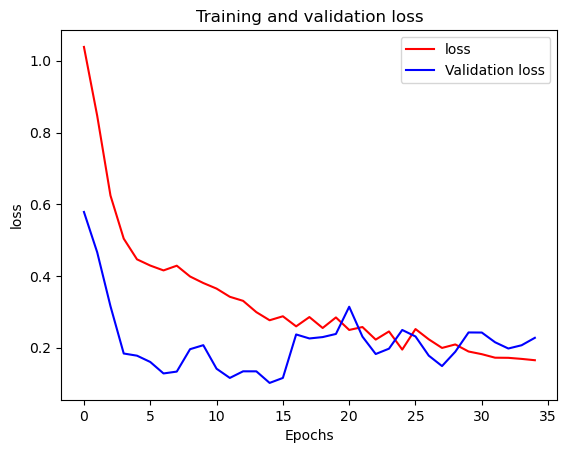

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()

#### Entrainement pour Lepen

In [18]:
model = createModel()
history = model.fit(X_trainNN, y_trainNN_Lepen,
                    epochs=1000,validation_data=(X_valNN, y_valNN_Lepen),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.8087 - val_loss: 0.6556
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8260 - val_loss: 0.6267
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6621 - val_loss: 0.5999
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6615 - val_loss: 0.5825
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4840 - val_loss: 0.5682
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4225 - val_loss: 0.5706
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3701 - val_loss: 0.5636
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3423 - val_loss: 0.5306
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2638 - val_loss: 0.4935
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2690 - val_loss: 0.4443
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2501 - val_loss: 0.4250
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2453 - val_l

In [19]:
best_model = tf.keras.models.load_model("best_model_valeur.keras")

print("Sur les entrainement la valeur reel : ", scalerLepen.inverse_transform(y_trainNN_Lepen[0].reshape(-1, 1)), "; valeur predite : ",scalerLepen.inverse_transform(best_model.predict(X_trainNN[0:1]).reshape(-1, 1)))

y_pred_NN = best_model.predict(X_testNN)

reel = scalerLepen.inverse_transform(y_testNN_Lepen)
prediction = scalerLepen.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

print("Affichage des predictions sur le test pour Lepen")
affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN, y_testNN_Lepen)
print("Perte de test :", test_loss)
print("R-value :", r2_score(np.squeeze(y_testNN_Lepen),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sur les entrainement la valeur reel :  [[57.53]] ; valeur predite :  [[43.239456]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Affichage des predictions sur le test pour Lepen
valeur prédite : 40.432125 valeur réelle : [53.3960177] écart : [12.96389261]
valeur prédite : 45.079224 valeur réelle : [50.42794007] écart : [5.34871644]
valeur prédite : 44.703945 valeur réelle : [49.62928571] écart : [4.92534055]
valeur prédite : 57.05371 valeur réelle : [41.12871134] écart : [15.9249996]
valeur prédite : 48.274956 valeur réelle : [39.15983051] écart : [9.11512524]
valeur prédite : 48.81278 valeur réelle : [57.3691411] écart : [8.55636263]
valeur prédite : 43.20293 valeur réelle : [53.22037344] écart : [10.01744299]
valeur prédite : 39.178856 valeur réelle : [58.3791314] écart : [19.20027551]
valeur prédite : 52.366596 valeur réelle : [41.40827309] écart : [10.95832313]
valeur prédite : 44.536495 valeur réelle : [52.86975989] écart : [8.33326468]
1/1 ━━━━━━━━━━

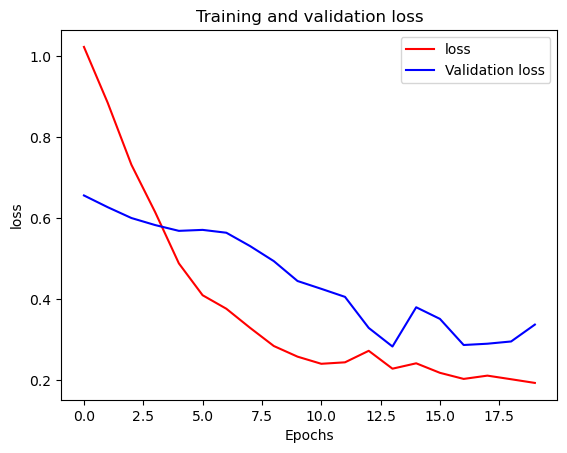

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()